In [ ]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 8.5 MB/s eta 0:00:00


#Time Series Analysis for Energy Production Forecasting

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from scipy import stats
from sklearn.metrics import r2_score

# 1. Import Data

In [ ]:
energy_data = pd.read_csv("Electric_Production.csv", index_col=0)
energy_data.index = pd.to_datetime(energy_data.index)
energy_data.columns = ['Energy_Prod']
energy_data.head()

,Energy_Prod
DATE,
1985-01-01,72.5052
1985-02-01,70.6720
1985-03-01,62.4502
1985-04-01,57.4714
1985-05-01,55.3151


# 2. Explore the data - visualization and stationarity check

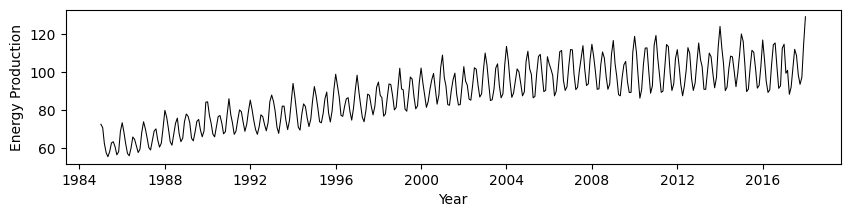

In [ ]:
plt.figure(figsize=(10, 2))
plt.plot(energy_data, color="black", linewidth=0.75)
plt.xlabel("Year")
plt.ylabel("Energy Production")
plt.show()

In [ ]:
energy_data = energy_data.dropna()
energy_vals = energy_data.values
adf_result = adfuller(energy_vals)
print('p-value: %f' % adf_result[1])

p-value: 0.186215


# 3. Stationarity Through Differencing

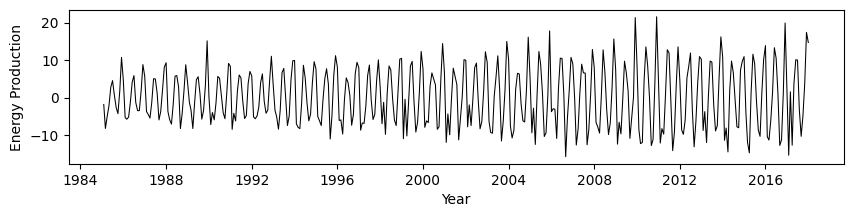

In [ ]:
energy_data["Energy_Prod"] = energy_data["Energy_Prod"].diff()
plt.figure(figsize=(10, 2))
plt.plot(energy_data, color="black", linewidth=0.75)
plt.xlabel("Year")
plt.ylabel("Energy Production")
plt.show()

In [ ]:
energy_data = energy_data.dropna()
energy_vals = energy_data.values
adf_result = adfuller(energy_vals)
print('p-value: %f' % adf_result[1])

p-value: 0.000000


# 4. Model Specification
 **4.1 ACF and PACF**

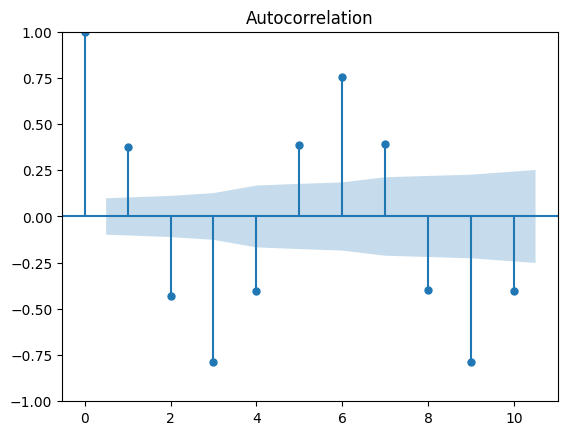

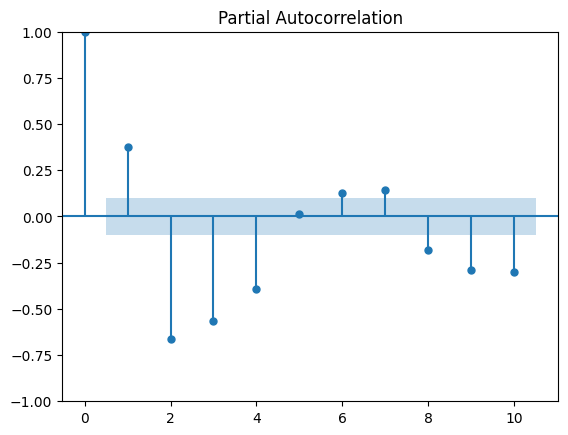

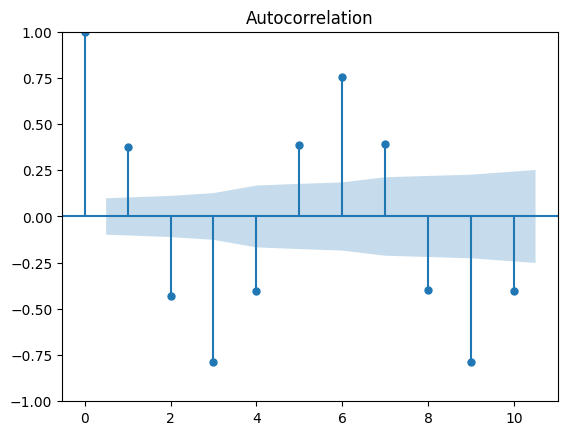

In [ ]:
plot_pacf(energy_data, lags=10)
plot_acf(energy_data, lags=10)

**4.2 Split data into train and test**

In [ ]:
train_data = energy_data.loc['1985-02-01':'2015-11-01']
test_data = energy_data.loc['2015-12-01':]

**EAFC Model**

In [ ]:
model1 = pm.arima.arima.ARIMA((2,0,2))


**4.3.1 Model by AIC**

In [ ]:
model_aic = pm.auto_arima(train_data, d=0, start_p=1, start_q=1,
                          max_p=3, max_q=3, start_P=0,
                          seasonal=False, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True, information_criterion="aic")

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=2424.545, Time=1.17 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2546.076, Time=0.21 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=2489.893, Time=0.29 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=2423.886, Time=0.28 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=2346.929, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=2312.761, Time=0.28 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=1931.623, Time=0.62 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=2064.773, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=1928.472, Time=0.74 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=2046.474, Time=0.28 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=2.99 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=1926.764, Time=2.13 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=2267.939, Time=0.23 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=inf, Time=1.02 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]       

**4.3.2 Model by BIC**

In [ ]:
model_bic = pm.auto_arima(train_data, d=0, start_p=1, start_q=1,
                          max_p=3, max_q=3, start_P=0,
                          seasonal=False, trace=True,
                          error_action='ignore',
                          suppress_warnings=True,
                          stepwise=True, information_criterion="bic")

Performing stepwise search to minimize bic
 ARIMA(1,0,1)(0,0,0)[0]             : BIC=2436.286, Time=0.11 sec
 ARIMA(0,0,0)(0,0,0)[0]             : BIC=2549.989, Time=0.06 sec
 ARIMA(1,0,0)(0,0,0)[0]             : BIC=2497.720, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0]             : BIC=2431.713, Time=0.09 sec
 ARIMA(0,0,2)(0,0,0)[0]             : BIC=2358.670, Time=0.14 sec
 ARIMA(1,0,2)(0,0,0)[0]             : BIC=2328.415, Time=0.30 sec
 ARIMA(2,0,2)(0,0,0)[0]             : BIC=1951.191, Time=0.59 sec
 ARIMA(2,0,1)(0,0,0)[0]             : BIC=2080.427, Time=0.19 sec
 ARIMA(3,0,2)(0,0,0)[0]             : BIC=1951.953, Time=0.76 sec
 ARIMA(2,0,3)(0,0,0)[0]             : BIC=1950.245, Time=0.69 sec
 ARIMA(1,0,3)(0,0,0)[0]             : BIC=2287.507, Time=0.22 sec
 ARIMA(3,0,3)(0,0,0)[0]             : BIC=inf, Time=1.00 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : BIC=inf, Time=1.03 sec

Best model:  ARIMA(2,0,3)(0,0,0)[0]          
Total fit time: 5.268 seconds


# 5. Fitting models on training data

In [ ]:
fit_eacf = model1.fit(train_data)
fit_aic = model_aic.fit(train_data)
fit_bic = model_bic.fit(train_data)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**5.1 Estimated parameters**

In [ ]:
print(fit_eacf.params())
print(fit_aic.params())
print(fit_bic.params())

intercept     0.100548
ar.L1         1.000041
ar.L2        -0.999280
ma.L1        -1.061364
ma.L2         0.991150
sigma2       10.302036
dtype: float64
ar.L1      1.000074
ar.L2     -0.999608
ma.L1     -1.192838
ma.L2      1.129876
ma.L3     -0.158729
sigma2    10.114473
dtype: float64
ar.L1      1.000074
ar.L2     -0.999608
ma.L1     -1.192838
ma.L2      1.129876
ma.L3     -0.158729
sigma2    10.114473
dtype: float64


# 6. Forecasting

**Model AIC**

In [ ]:
predict_aic = model_aic.predict(n_periods=26)
predict_aic_df = pd.DataFrame(predict_aic, index=test_data.index, columns=['Model_AIC'])

**Model EAFC**

In [ ]:
predict_eafc = model1.predict(n_periods=26)
predict_eafc_df = pd.DataFrame(predict_eafc, index=test_data.index, columns=['Model_EAFC'])

**Model BIC**

In [ ]:
predict_bic = model_bic.predict(n_periods=26)
predict_bic_df = pd.DataFrame(predict_bic, index=test_data.index, columns=['Model_BIC'])

**Plot predictions**

<Axes: xlabel='DATE'>

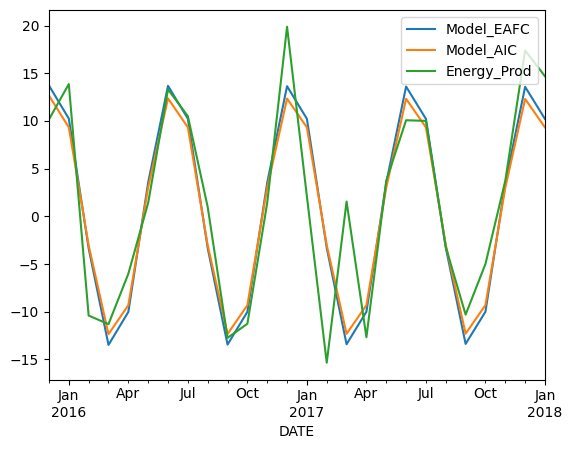

In [ ]:
predictions_df = pd.concat([predict_eafc_df, predict_aic_df, test_data], axis=1)
predictions_df.plot()

**6.1. Residuals Analysis**

In [ ]:
residuals_model_aic = test_data["Energy_Prod"] - predict_aic_df["Model_AIC"]
shapiro_test_aic = stats.shapiro(residuals_model_aic)
print("Shapiro-Wilk Test for residuals in Model_AIC:")
print("Statistic:", shapiro_test_aic.statistic)
print("p-value:", shapiro_test_aic.pvalue)

Shapiro-Wilk Test for residuals in Model_AIC:
Statistic: 0.959775013819985
p-value: 0.3871257252186704


In [ ]:
residuals_model_bic = test_data["Energy_Prod"] - predict_bic_df["Model_BIC"]
shapiro_test_bic = stats.shapiro(residuals_model_bic)
print("Shapiro-Wilk Test for residuals in Model_BIC:")
print("Statistic:", shapiro_test_bic.statistic)
print("p-value:", shapiro_test_bic.pvalue)

Shapiro-Wilk Test for residuals in Model_BIC:
Statistic: 0.959775013819985
p-value: 0.3871257252186704


In [ ]:
residuals_model_eafc = test_data["Energy_Prod"] - predict_eafc_df["Model_EAFC"]
shapiro_test_eafc = stats.shapiro(residuals_model_eafc)
print("Shapiro-Wilk Test for residuals in Model_BIC:")
print("Statistic:", shapiro_test_eafc.statistic)
print("p-value:", shapiro_test_eafc.pvalue)

Shapiro-Wilk Test for residuals in Model_BIC:
Statistic: 0.9505737315552196
p-value: 0.23917403471286303



# 7. R2-Score and MSE Comparison

**Model EAFC**

In [ ]:
print("Model EAFC")
print("Mean absolute error: %.2f" % np.mean(np.absolute(residuals_model_eafc)))
print("Residual sum of squares (MSE): %.2f" % np.mean((residuals_model_eafc) ** 2))
print("R2-score: %.2f" % r2_score(test_data["Energy_Prod"], predict_eafc_df["Model_EAFC"]))

Model EAFC
Mean absolute error: 3.70
Residual sum of squares (MSE): 26.53
R2-score: 0.75


**Model AIC**

In [ ]:
print("Model AIC")
print("Mean absolute error: %.2f" % np.mean(np.absolute(residuals_model_aic)))
print("Residual sum of squares (MSE): %.2f" % np.mean((residuals_model_aic) ** 2))
print("R2-score: %.2f" % r2_score(test_data["Energy_Prod"], predict_aic_df["Model_AIC"]))

Model AIC
Mean absolute error: 3.70
Residual sum of squares (MSE): 25.78
R2-score: 0.76


# 8. SARIMA Model

In [ ]:
model_sarima = pm.auto_arima(train_data, d=0, start_p=1, start_q=1,
                             max_p=3, max_q=3, m=12, start_P=0,
                             seasonal=True, trace=True,
                             error_action='ignore',
                             suppress_warnings=True,
                             stepwise=True, information_criterion="aic")

fit_sarima = model_sarima.fit(train_data)
sarima_predict = model_sarima.predict(n_periods=26)
sarima_predict_df = pd.DataFrame(sarima_predict, index=test_data.index, columns=['Model_SARIMA'])

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,1)[12] intercept   : AIC=2210.776, Time=1.60 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=2548.056, Time=0.12 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=inf, Time=1.70 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=2208.942, Time=0.49 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=2546.076, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[12] intercept   : AIC=2425.870, Time=0.34 sec
 ARIMA(0,0,1)(1,0,1)[12] intercept   : AIC=1757.296, Time=1.70 sec
 ARIMA(0,0,1)(1,0,0)[12] intercept   : AIC=1866.706, Time=1.31 sec
 ARIMA(0,0,1)(2,0,1)[12] intercept   : AIC=1757.737, Time=8.12 sec
 ARIMA(0,0,1)(1,0,2)[12] intercept   : AIC=1756.949, Time=6.89 sec
 ARIMA(0,0,1)(0,0,2)[12] intercept   : AIC=2123.867, Time=1.34 sec
 ARIMA(0,0,1)(2,0,2)[12] intercept   : AIC=1757.075, Time=8.19 sec
 ARIMA(0,0,0)(1,0,2)[12] intercept   : AIC=1778.974, Time=4.23 sec
 ARIMA(1,0,1)(1,0,2)[12] intercept   : AIC=1700.040, Time=5.26 sec
 ARIMA(1,0,1)(0,0,2)[12]

**Plot SARIMA predictions**

<Axes: xlabel='DATE'>

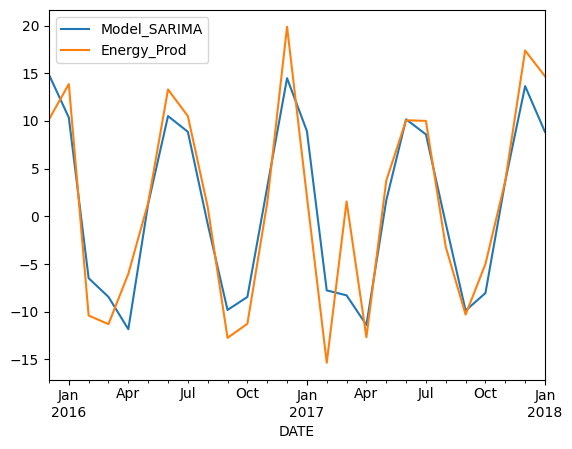

In [ ]:
sarima_predictions = pd.concat([sarima_predict_df, test_data], axis=1)
sarima_predictions.plot()

In [ ]:
# Compare SARIMA with other models
print("Model SARIMA")
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_data["Energy_Prod"] - sarima_predict_df["Model_SARIMA"])))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_data["Energy_Prod"] - sarima_predict_df["Model_SARIMA"]) ** 2))
print("R2-score: %.2f" % r2_score(test_data["Energy_Prod"], sarima_predict_df["Model_SARIMA"]))

Model SARIMA
Mean absolute error: 3.25
Residual sum of squares (MSE): 16.41
R2-score: 0.85
